In [22]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import colorsys
from collections import Counter
%matplotlib inline

In [4]:
df = pd.read_csv('/Users/xingobar/Downloads/vgsales.csv')

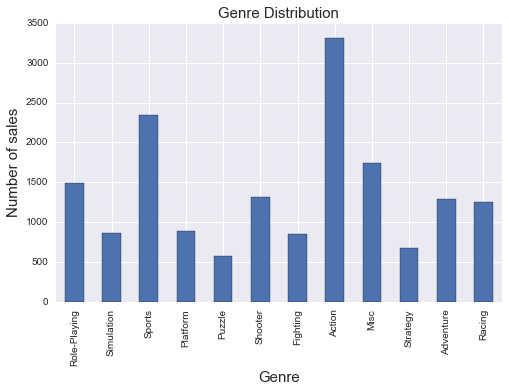

In [5]:
fig,ax = plt.subplots(figsize=(8,5))
df['Genre'].value_counts(sort=False).plot(kind='bar',ax=ax,rot =90)
plt.title('Genre Distribution',fontsize=15)
plt.xlabel('Genre',fontsize=15)
plt.ylabel('Number of sales',fontsize=15)

# Top ten genre

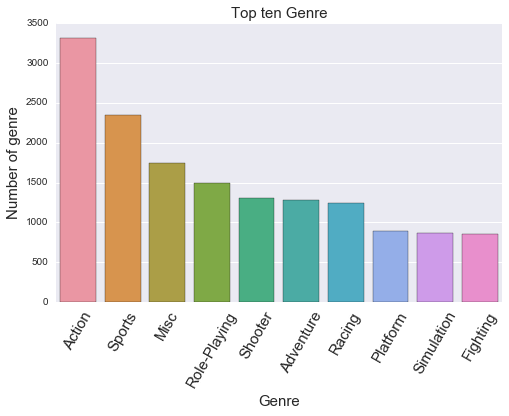

In [6]:
genre = Counter(df['Genre'].dropna().tolist()).most_common(10)
genre_name = [name[0] for name in genre]
genre_counts = [name[1] for name in genre]

fig,ax = plt.subplots(figsize=(8,5))
sns.barplot(x=genre_name,y=genre_counts,ax=ax)
plt.title('Top ten Genre',fontsize=15)
plt.xlabel('Genre',fontsize=15)
plt.ylabel('Number of genre',fontsize=15)
ticks = plt.setp(ax.get_xticklabels(),fontsize=15,rotation=60)

# Top ten platform

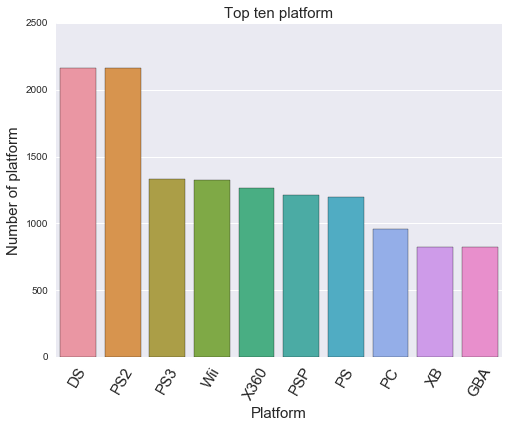

In [7]:
platform = Counter(df['Platform'].dropna().tolist()).most_common(10)
platform_name = [name[0] for name in platform]
platform_count = [name[1] for name in platform]

fig,ax = plt.subplots(figsize=(8,6))
sns.barplot(x=platform_name,y=platform_count,ax=ax)
plt.title('Top ten platform',fontsize=15)
plt.ylabel('Number of platform',fontsize=15)
plt.xlabel('Platform',fontsize=15)
ticks = plt.setp(ax.get_xticklabels(),fontsize=15,rotation=60)

# Top ten publisher

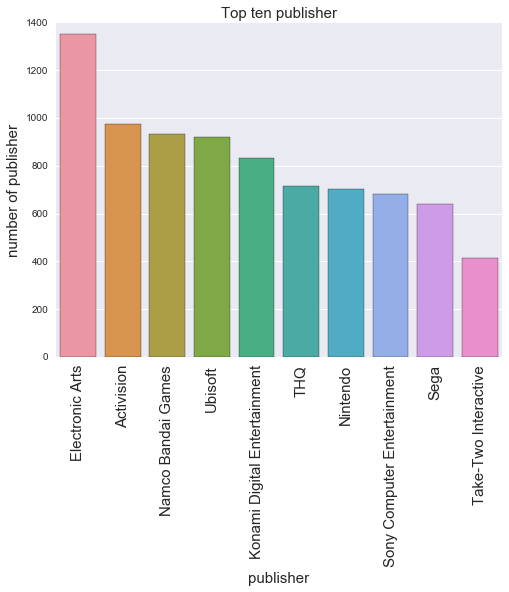

In [8]:
publisher = Counter(df['Publisher'].dropna().tolist()).most_common(10)
publisher_name = [name[0] for name in publisher]
publisher_count = [name[1] for name in publisher]

fig,ax = plt.subplots(figsize=(8,6))
sns.barplot(x=publisher_name,y=publisher_count,ax=ax)
plt.title('Top ten publisher',fontsize=15)
plt.ylabel('number of publisher',fontsize=15)
plt.xlabel('publisher',fontsize=15)
ticks = plt.setp(ax.get_xticklabels(),fontsize=15,rotation=90)

In [9]:
publisher_sales = df[['Publisher','NA_Sales','EU_Sales']]
publisher_sales.head()

,Publisher,NA_Sales,EU_Sales
0,Nintendo,41.49,29.02
1,Nintendo,29.08,3.58
2,Nintendo,15.85,12.88
3,Nintendo,15.75,11.01
4,Nintendo,11.27,8.89


In [10]:
publisher_list = df['Publisher'].unique()
total_NA_revenue = []
total_EU_revenue = []
total_revenue = []
for publisher in publisher_list:
    total_NA_revenue.append(publisher_sales[publisher_sales['Publisher'] == publisher]['NA_Sales'].sum())
    total_EU_revenue.append(publisher_sales[publisher_sales['Publisher'] == publisher]['EU_Sales'].sum())

    
for idx in range(len(publisher_list)):
    total_revenue.append(total_NA_revenue[idx] + total_EU_revenue[idx])
    
publisher_revenue_dataframe = pd.DataFrame({'publisher':publisher_list,
                                            'total_NA_Sales':total_NA_revenue,
                                            'total_EU_Sales':total_EU_revenue,
                                            'total_revenue':total_revenue
                                            })
publisher_revenue_dataframe = publisher_revenue_dataframe.sort(['total_NA_Sales'],
                                                               ascending=False).head()
publisher_revenue_dataframe.reset_index(drop=True).head()

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:19: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,publisher,total_EU_Sales,total_NA_Sales,total_revenue
0,Nintendo,418.74,816.87,1235.61
1,Electronic Arts,371.27,595.07,966.34
2,Activision,215.53,429.70,645.23
3,Sony Computer Entertainment,187.72,265.22,452.94
4,Ubisoft,163.32,253.43,416.75


# Top ten sales

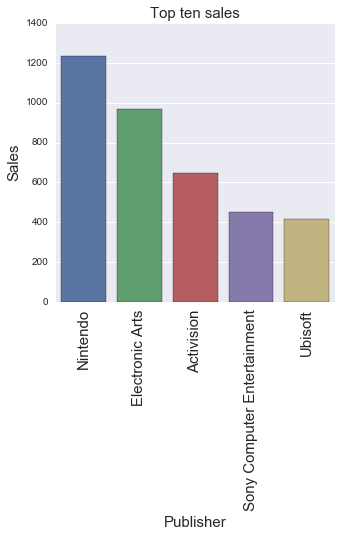

In [11]:
fig,ax = plt.subplots(figsize=(5,5))
sns.barplot(data=publisher_revenue_dataframe,x='publisher',y='total_revenue',ax=ax)
plt.title('Top ten sales',fontsize=15)
plt.xlabel('Publisher',fontsize=15)
plt.ylabel('Sales',fontsize=15)
ticks = plt.setp(ax.get_xticklabels(),fontsize=15,rotation=90)

# Every year

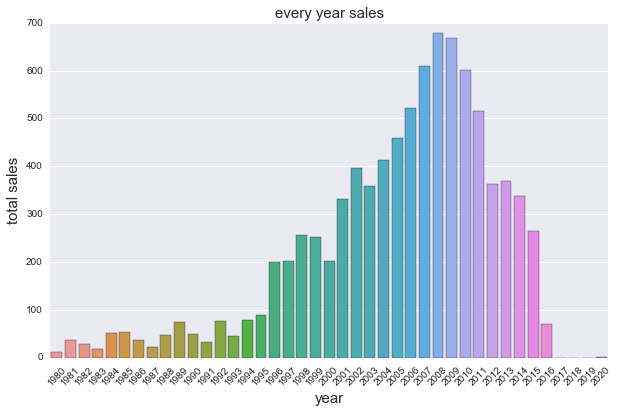

In [12]:
min_year = int(df['Year'].dropna().min())
max_year = int(df['Year'].dropna().max())
year_range = range(min_year,max_year+1)
year_sale = []
year_list = []
for year in year_range:
    year_sale.append(df[df['Year'] == year].dropna()['Global_Sales'].sum())
    year_list.append(year)

fig,ax = plt.subplots(figsize=(10,6))
sns.barplot(x = year_list,y = year_sale,ax=ax)
plt.title('every year sales',fontsize=15 )
ticks = plt.setp(ax.get_xticklabels(),fontsize=10,rotation=45)
plt.ylabel('total sales',fontsize=15)
plt.xlabel('year',fontsize=15)

# Genre Sales

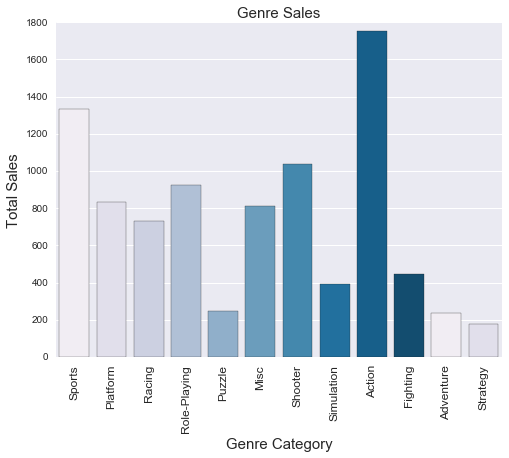

In [13]:
sns.set_color_codes('pastel')
genre_feature = df['Genre'].unique()
sale = []

for genre in genre_feature:
    sale.append(df[df['Genre'] == genre]['Global_Sales'].sum())
    
    
fig,ax = plt.subplots(figsize=(8,6))
plt.title('Genre Sales',fontsize=15)
sns.barplot(x = genre_feature,y = sale , ax =ax,palette=sns.color_palette("PuBu", 10))
plt.ylabel('Total Sales',fontsize=15)
plt.xlabel('Genre Category',fontsize=15)
ticks = plt.setp(ax.get_xticklabels(),fontsize=12,rotation=90)

# Platform sales

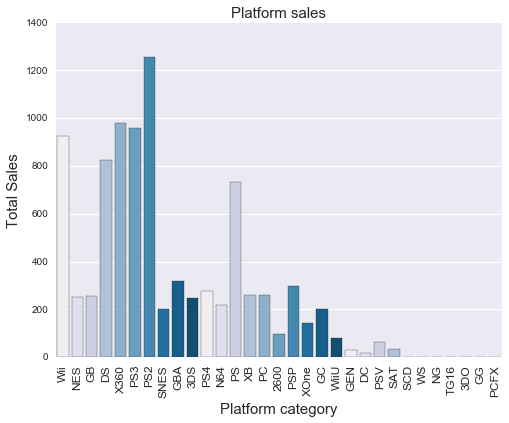

In [14]:
platform_feature = df['Platform'].unique()
platform_sale = []

for platform in platform_feature:
    platform_sale.append(df[df['Platform'] == platform]['Global_Sales'].sum())

fig,ax = plt.subplots(figsize=(8,6))
sns.barplot(x = platform_feature,y = platform_sale ,
            ax=ax ,palette=sns.color_palette("PuBu", 10))

plt.title('Platform sales',fontsize=15)
plt.xlabel('Platform category',fontsize=15)
plt.ylabel('Total Sales',fontsize=15)
ticks = plt.setp(ax.get_xticklabels(),fontsize=12,rotation = 90)

# Publisher sales every year

In [15]:
publisher_feature = publisher_revenue_dataframe['publisher'][:5]
columns = ['Publisher','year','sales']
publisher_revenue_every_year = pd.DataFrame(columns = columns)

for publisher in publisher_feature:
    curr_publisher = df[df['Publisher'] == publisher]
    for year in year_range:
        entry = pd.DataFrame([[publisher,
                               year,
                              curr_publisher[curr_publisher['Year'] == year]['Global_Sales'].mean()]],
                            columns=columns)
        publisher_revenue_every_year = publisher_revenue_every_year.append(entry)
        
publisher_revenue_every_year.fillna(0,inplace=True)
publisher_revenue_every_year['sales'] = publisher_revenue_every_year['sales'] * 100
publisher_revenue_every_year['year_group'] =pd.cut(publisher_revenue_every_year['year'],
                                                   [1979,1985,1990,1995,2000,2005,2010,2020],
                                                   labels = ['1980-1985','1985-1990',
                                                             '1990-1995',
                                                             '1995-2000','2000-2005',
                                                             '2005-2010','2010+'])
publisher_revenue_every_year.head()

,Publisher,year,sales,year_group
0,Nintendo,1980.0,0.000000,1980-1985
0,Nintendo,1981.0,0.000000,1980-1985
0,Nintendo,1982.0,0.000000,1980-1985
0,Nintendo,1983.0,182.666667,1980-1985
0,Nintendo,1984.0,506.222222,1980-1985


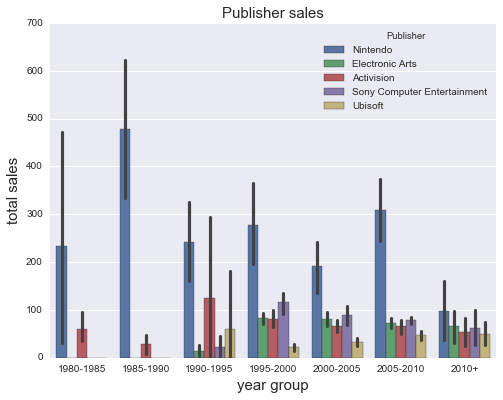

In [16]:
fig,ax = plt.subplots(figsize=(8,6))

sns.barplot(data=publisher_revenue_every_year,x = 'year_group',y='sales',hue='Publisher')
plt.xlabel('year group',fontsize=15)
plt.ylabel('total sales',fontsize=15)
plt.title('Publisher sales',fontsize=15)

# Platform vs year

//anaconda/lib/python2.7/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


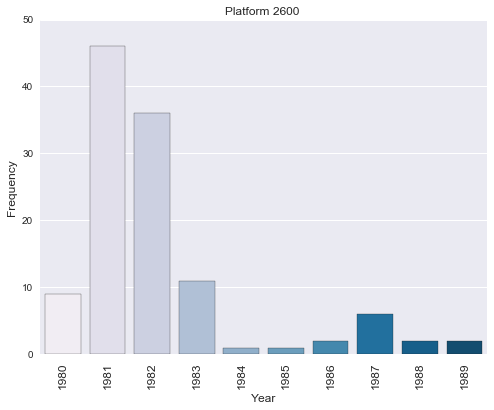

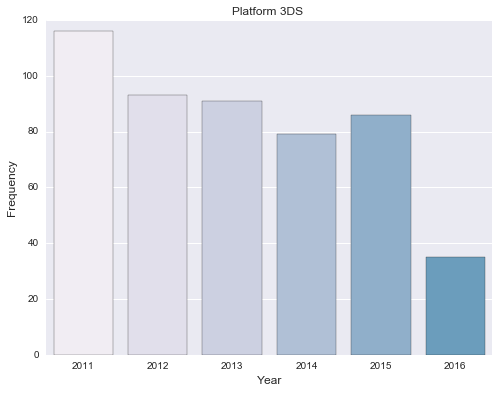

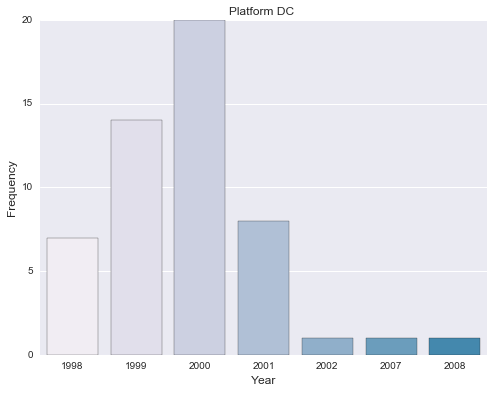

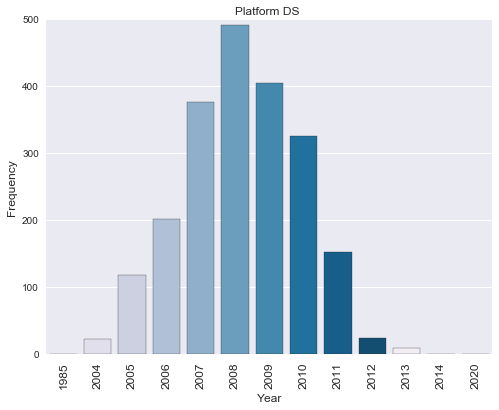

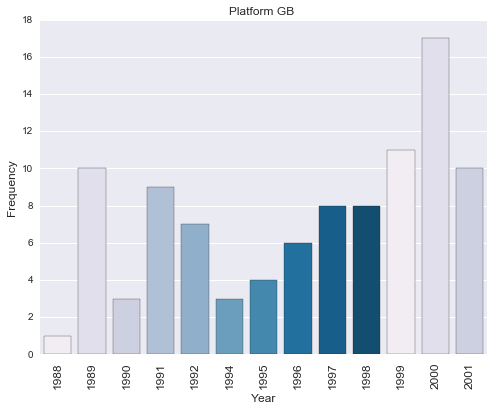

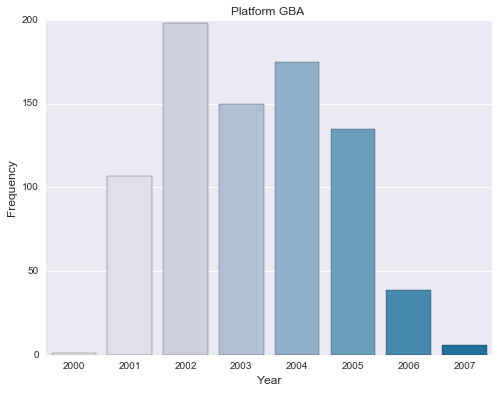

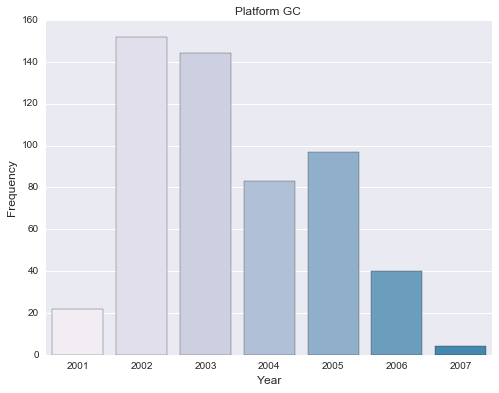

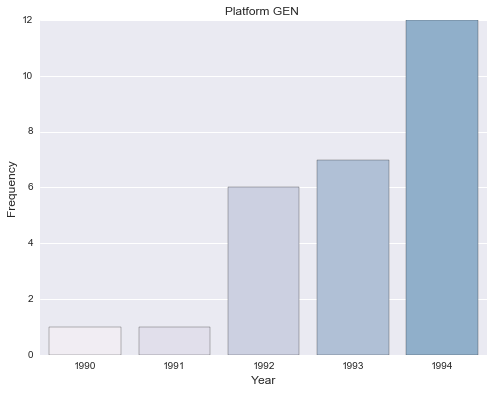

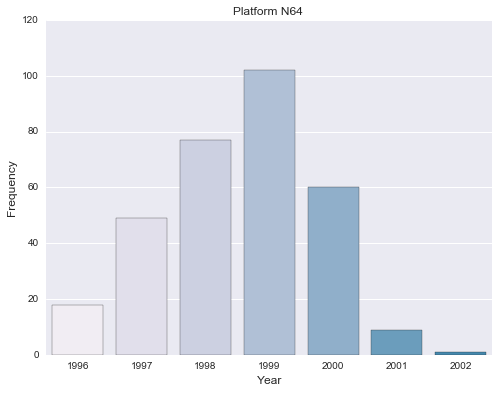

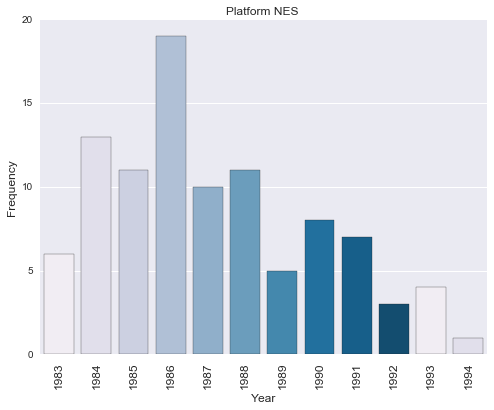

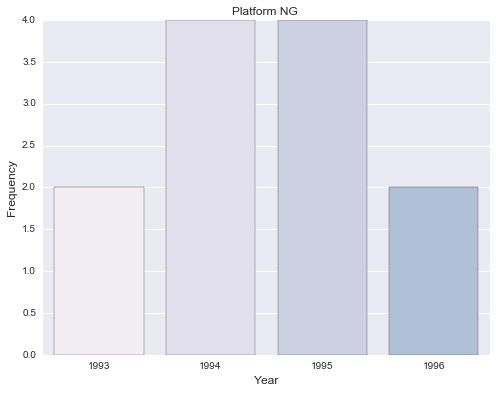

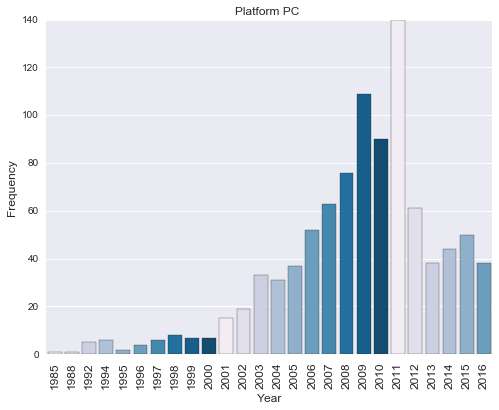

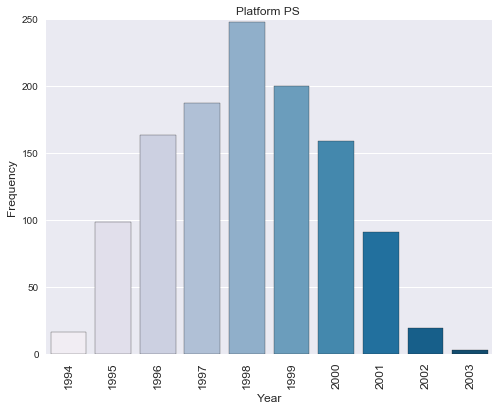

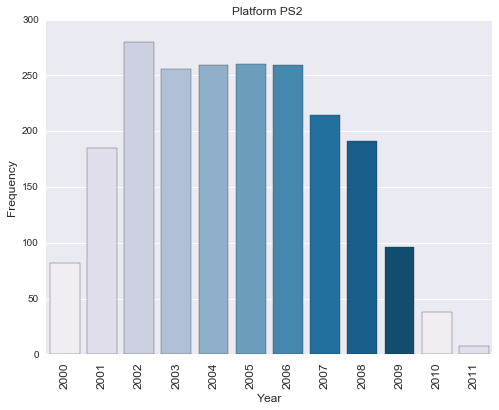

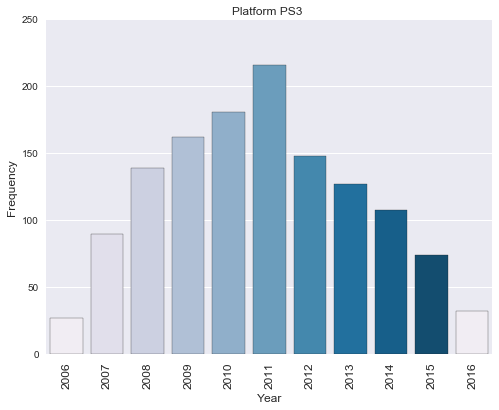

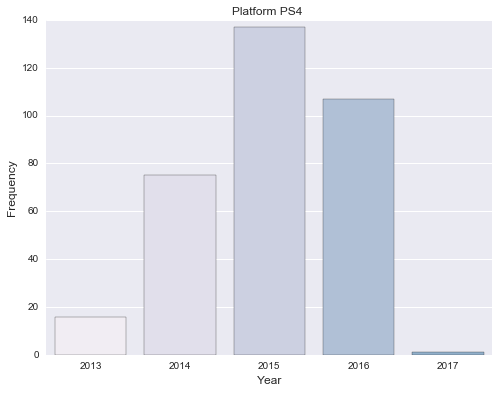

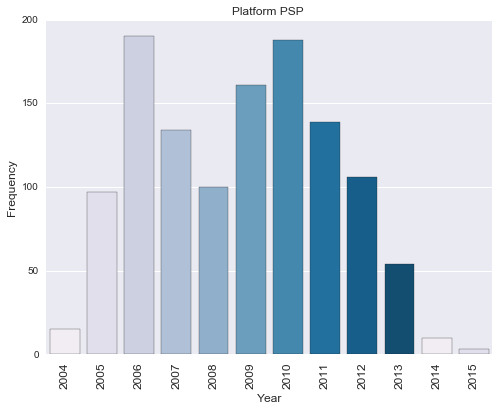

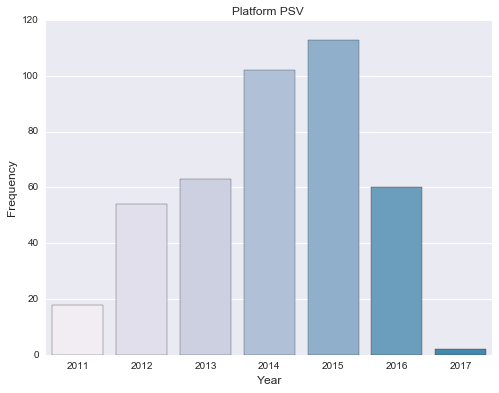

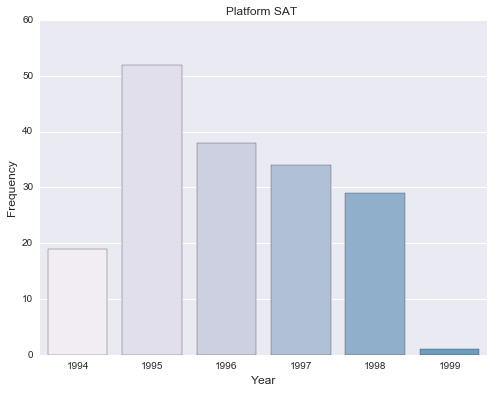

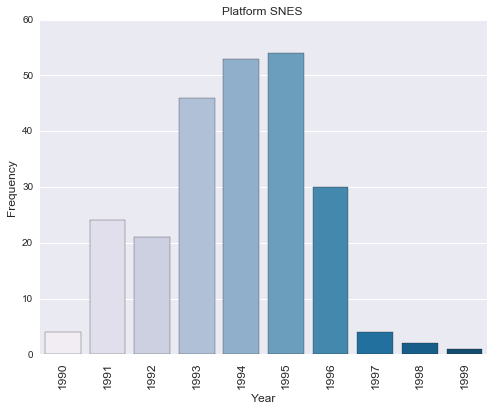

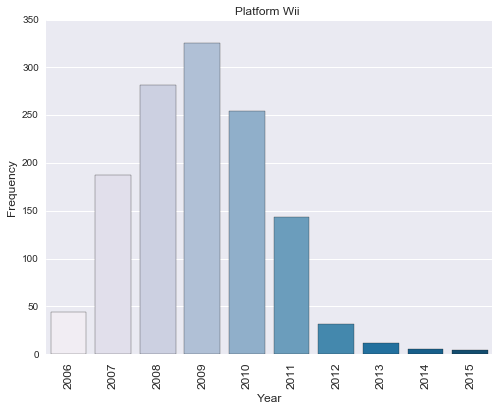

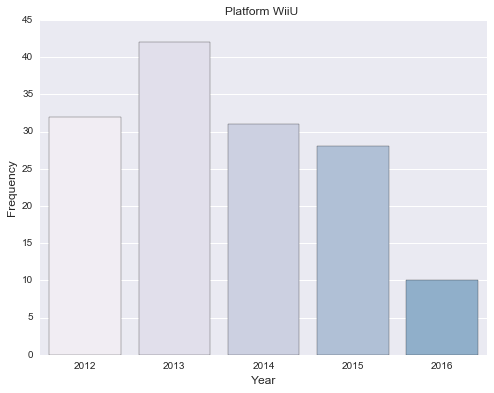

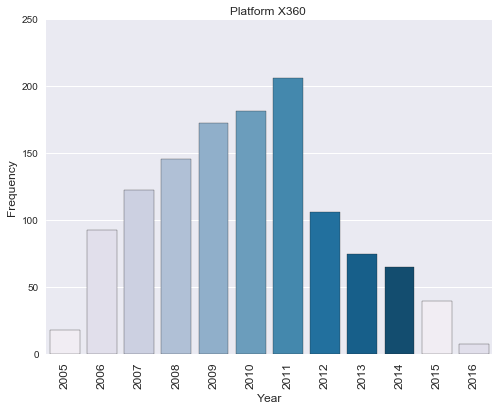

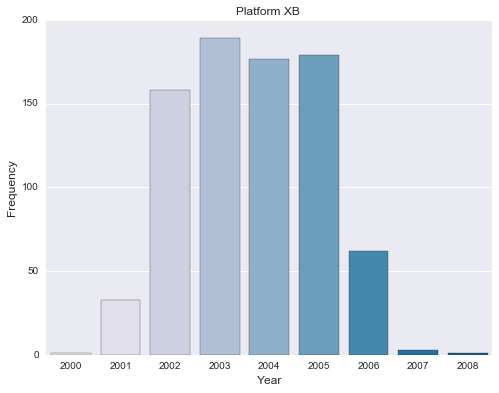

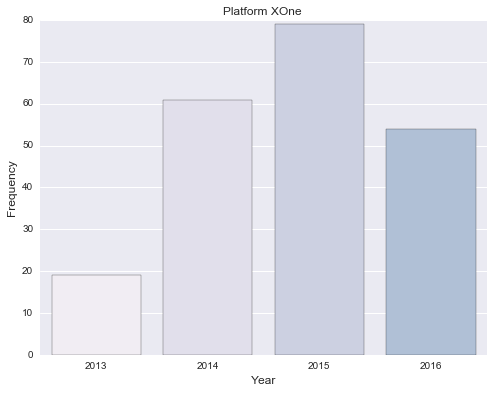

In [17]:
platform_year = df.groupby([df['Platform'],df['Year']]).size()
platform_year_index = platform_year.index.levels[0]

for idx in range(len(platform_year_index)):
    if len(platform_year[platform_year_index[idx]]) <=3:
        continue
    fig,ax = plt.subplots(figsize=(8,6))
    year = platform_year[platform_year_index[idx]].index.astype(int)  ## year
    count = platform_year[platform_year_index[idx]].values ## count
    
    if len(platform_year[platform_year_index[idx]]) >=10:
        ticks = plt.setp(ax.get_xticklabels(),fontsize=12,rotation=90)
    
    plt.title('Platform %s ' %(platform_year_index[idx]) )
    plt.xlabel('Year',fontsize=12)
    plt.ylabel('Frequency',fontsize=12)
    sns.barplot(x = year, y= count,ax =ax,palette=sns.color_palette("PuBu", 10))

# (heatmap) Platform vs Year

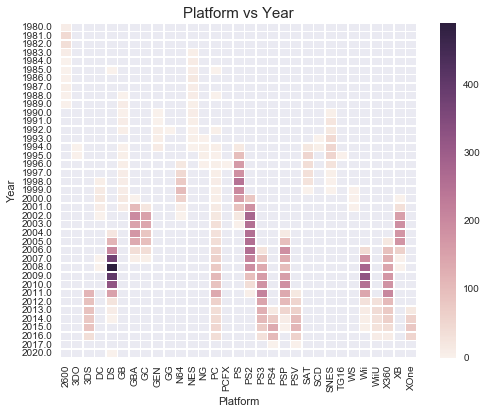

In [18]:
platform_year_heatmap = pd.pivot_table(df,values=['Global_Sales'],
                                       index=['Year'],
                                       columns=['Platform'],
                                       aggfunc='count')

fig,ax = plt.subplots(figsize=(8,6))
plt.title('Platform vs Year',fontsize=15)
sns.heatmap(platform_year_heatmap['Global_Sales'],
            linewidths=.5,annot=False,fmt='2.0f',vmin=0,ax=ax)

# The Global Sales of Publisher vs Year

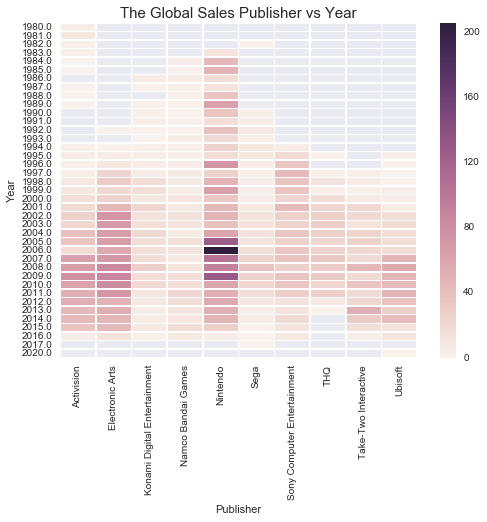

In [19]:
publisher_year = df.groupby(['Publisher'])['Global_Sales'].sum()
publisher_year = publisher_year.sort_values(ascending=False)[:10]

table_count = pd.pivot_table(data =  df[df['Publisher'].isin(publisher_year.index)],
                             columns=['Publisher'],index=['Year'],
                             values=['Global_Sales'],aggfunc='sum')

fig,ax = plt.subplots(figsize=(8,6))
sns.heatmap(table_count['Global_Sales'],annot=False,ax=ax,vmin=0,linewidth=.5)
plt.title('The Global Sales Publisher vs Year',fontsize=15)

# Platform vs NA_Sales

In [43]:
platform_feat = df['Platform'].unique()
genre_feat = df['Genre'].unique()
columns = ['Platform','Genre','NA_Sales']
platform_genre = pd.DataFrame()
for platform in platform_feat:
    curr_platform = df[df['Platform'] == platform]
    for genre in genre_feat:
        platform_genre_sum = curr_platform[curr_platform['Genre'] == genre]['NA_Sales'].sum()
        entry = pd.DataFrame([[platform,genre,platform_genre_sum]],columns=columns)
        platform_genre = platform_genre.append(entry)
  
platform_genre.head()

,Platform,Genre,NA_Sales
0,Wii,Sports,151.77
0,Wii,Platform,48.30
0,Wii,Racing,31.52
0,Wii,Role-Playing,5.74
0,Wii,Puzzle,9.28


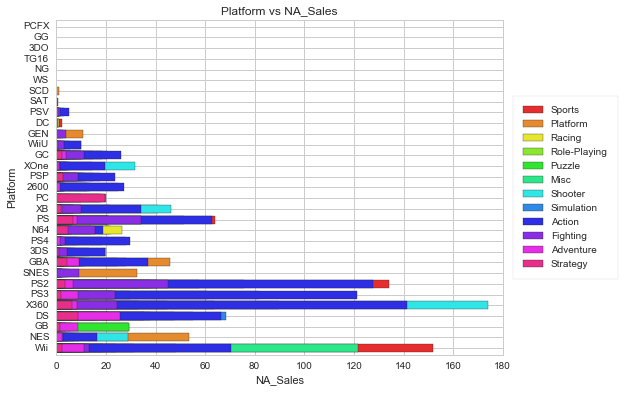

In [49]:
# http://stackoverflow.com/questions/22787209/how-to-have-clusters-of-stacked-bars-with-python-pandas
sns.set_style("whitegrid")
sns.set_color_codes('pastel')
length = len(platform_genre.Genre.unique())
HSV_tuples = [(x*1.0/length, 0.8, 0.9) for x in xrange(length)]
RGB = [colorsys.hsv_to_rgb(*i) for i in HSV_tuples]


axe = plt.subplot(111)
for i,genre in enumerate(platform_genre.Genre.unique()):
    
    curr_genre = platform_genre[platform_genre.Genre == genre]

    axe = curr_genre.plot(kind='barh', x = 'Platform',y = 'NA_Sales',
                    label=genre,stacked=True,figsize=(8,6)
                    ,width=0.75,color=RGB[i],ax=axe)
    
    
#ticks = plt.setp(ax.get_xticklabels(),rotation=90)
plt.title('Platform vs NA_Sales')
plt.ylabel('Platform')
plt.xlabel('NA_Sales')
#plt.legend(loc='best')
legend = plt.legend(loc='center left',bbox_to_anchor  =(1,0.5),
                    frameon=True,borderpad=1,borderaxespad=1)

# Platform vs US_Sales

In [58]:
columns = ['Platform','Genre','EU_Sales']
platform_genre = pd.DataFrame(columns = columns )
for platform in platform_feat:
    curr_platform = df[df['Platform'] == platform]
    for genre in genre_feat:
        platform_genre_sum = curr_platform[curr_platform['Genre'] == genre]['EU_Sales'].sum()
        
        entry = pd.DataFrame([[platform,genre,platform_genre_sum]],columns=columns)
        platform_genre = platform_genre.append(entry)
platform_genre.head()

,Platform,Genre,EU_Sales
0,Wii,Sports,94.99
0,Wii,Platform,24.08
0,Wii,Racing,19.98
0,Wii,Role-Playing,1.95
0,Wii,Puzzle,3.63


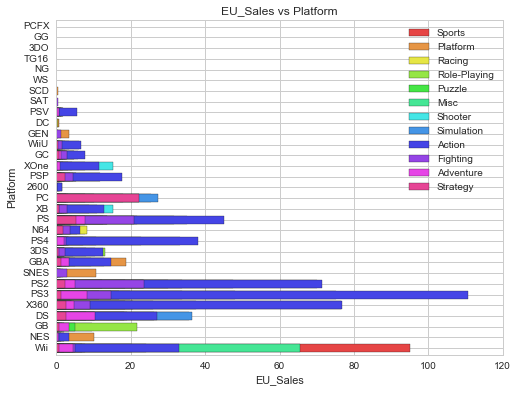

In [59]:

sns.set_style("whitegrid")
sns.set_color_codes('pastel')
length = len(platform_genre.Genre.unique())
HSV_tuples = [(x*1.0/length, 0.7, 0.9) for x in xrange(length)]
RGB = [colorsys.hsv_to_rgb(*i) for i in HSV_tuples]


axes = plt.subplot(111)
for i,genre in enumerate(platform_genre.Genre.unique()):
    
    curr_genre = platform_genre[platform_genre['Genre'] == genre]
    
    axes = curr_genre.plot(kind='barh',x = 'Platform',y='EU_Sales',
                          ax=axes,label = genre,color=RGB[i],width=0.75,
                          stacked=True,figsize=(8,6))
    
axes.set_title('EU_Sales vs Platform')
axes.set_ylabel('Platform')
axes.set_xlabel('EU_Sales')

# NA Total Sales by Genre

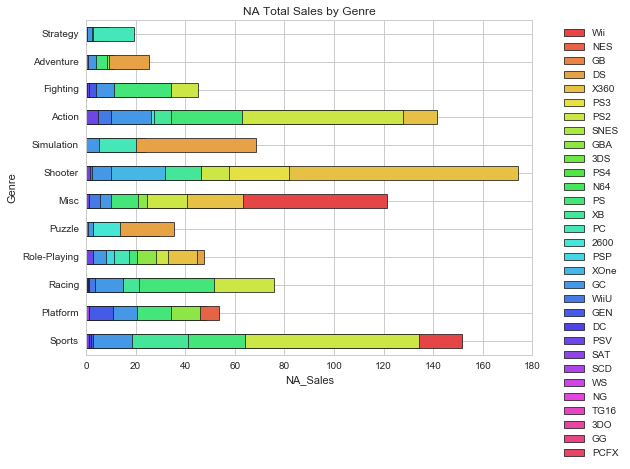

In [60]:
platform_feat = df['Platform'].unique()
genre_feat = df['Genre'].unique()
columns = ['Platform','Genre','NA_Sales']
platform_genre = pd.DataFrame()
for platform in platform_feat:
    curr_platform = df[df['Platform'] == platform]
    for genre in genre_feat:
        platform_genre_sum = curr_platform[curr_platform['Genre'] == genre]['NA_Sales'].sum()
        entry = pd.DataFrame([[platform,genre,platform_genre_sum]],columns=columns)
        platform_genre = platform_genre.append(entry)
  
platform_genre.head()

sns.set_style("whitegrid")
sns.set_color_codes('pastel')
length = len(platform_genre.Platform.unique())
HSV_tuples = [(x*1.0/length, 0.7, 0.9) for x in range(length)]
RGB = [colorsys.hsv_to_rgb(*i) for i in HSV_tuples]
axes = plt.subplot(111)
for i,platform in enumerate(platform_genre.Platform.unique()):
    
    curr_platform = platform_genre[platform_genre['Platform'] == platform]
    
    axes = curr_platform.plot(kind='barh',x ='Genre',y='NA_Sales',
                       ax=axes,label=platform,figsize=(8,6),
                       stacked=True,linewidth=0.75,color=RGB[i])

axes.set_title('NA Total Sales by Genre')
axes.set_ylabel('Genre')
axes.set_xlabel('NA_Sales')
plt.legend(loc='best',bbox_to_anchor=(1.05,1))

# Year sales by Area

In [35]:
min_year = int(df['Year'].min())
max_year = int(df['Year'].max())
year_range = range(min_year,max_year+1)
columns = ['Year','NA_Sales','EU_Sales','JP_Sales','Other_Sales']
yearly_area = pd.DataFrame(columns = columns)

for year in year_range:
    na_sum = df[df['Year'] == year]['NA_Sales'].sum()
    jp_sum = df[df['Year'] == year]['JP_Sales'].sum()
    eu_sum = df[df['Year'] == year]['EU_Sales'].sum()
    other_sum = df[df['Year'] == year]['Other_Sales'].sum()
    entry = pd.DataFrame([[year,na_sum,eu_sum,jp_sum,other_sum]],columns=columns)
    yearly_area = yearly_area.append(entry)
yearly_area.head()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1980.0,10.59,0.67,0.00,0.12
0,1981.0,33.40,1.96,0.00,0.32
0,1982.0,26.92,1.65,0.00,0.31
0,1983.0,7.76,0.80,8.10,0.14
0,1984.0,33.28,2.10,14.27,0.70


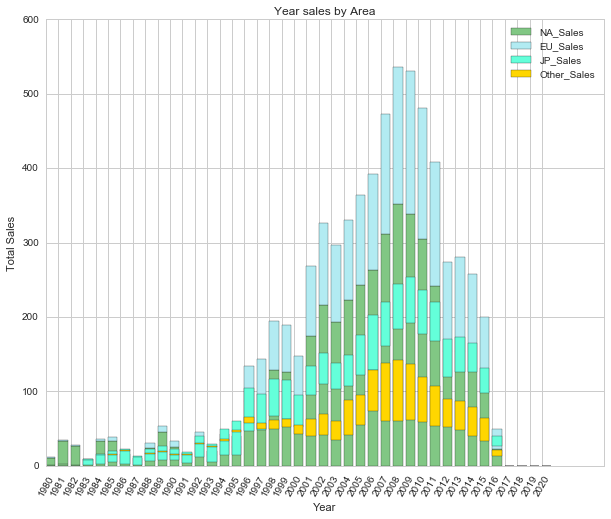

In [36]:
# http://matplotlib.org/1.3.1/examples/pylab_examples/bar_stacked.html
fig,ax = plt.subplots(figsize=(10,8))
plt.title('Year sales by Area')
p1 = plt.bar(yearly_area['Year'],yearly_area['NA_Sales'] , width=0.75,color='#81c784')
p2 = plt.bar(yearly_area['Year'],yearly_area['EU_Sales'] , width=0.75,color='#b2ebf2',
        bottom=yearly_area['NA_Sales'])
p3 = plt.bar(yearly_area['Year'],yearly_area['JP_Sales'] , width=0.75,color='#64ffda',
        bottom=yearly_area['EU_Sales'])
p4 = plt.bar(yearly_area['Year'],yearly_area['Other_Sales'] , width=0.75,color='#ffd600',
        bottom=yearly_area['JP_Sales'])

plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.legend((p1[0],p2[0],p3[0],p4[0]),('NA_Sales','EU_Sales','JP_Sales','Other_Sales'))
x_ticks = ax.set_xticks(year_range)
ticks = plt.setp(ax.get_xticklabels(),rotation=60)